In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read and import data science job listings dataset
data_science_jobs_df = pd.read_csv("resources/data_cleaned_2021.csv")
data_science_jobs_df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,...,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,...,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,...,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,...,0,0,0,0,0,0,0,data scientist,na,na


In [3]:
# Showing all columns to see which are relevant to our analyis
data_science_jobs_df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [4]:
# For purposes of data analysis, only going to keep relevant columns
data_analysis_df = data_science_jobs_df.drop(columns = ['Company Name','Salary Estimate','Job Description','Headquarters','Location','Revenue','Competitors',
                                                         'company_txt','Age','spark','aws',
                                                         'sql','sas','keras','pytorch','scikit',
                                                         'tensor','hadoop','tableau','bi','flink',
                                                         'mongo','google_an','job_title_sim'])
# Dropped all 'sr' positions in the 'seniority_by_title' column
data_analysis_df.drop(data_analysis_df[data_analysis_df['seniority_by_title']=='sr'].index,inplace = True)

# Dropped all positions that require a master's degree 'M' and PHD degree 'P' in the 'Degree' column
data_analysis_df.drop(data_analysis_df[data_analysis_df['Degree']=='M'].index,inplace = True)
data_analysis_df.drop(data_analysis_df[data_analysis_df['Degree']=='P'].index,inplace = True)

# Dropped row with an unknown company size
data_analysis_df.drop(data_analysis_df[data_analysis_df['Size']=='unknown'].index,inplace = True)

In [5]:
# Picking out unwanted job titles from the remaining list of jobs, picking them based on not
# sounding entry level and any non-relevant

unwanted_job_titles = ['College Hire - Data Scientist - Open to December 2019 Graduates',
                       'Data Analytics Manager','MongoDB Data Engineer II','VP, Data Science',
                      'Staff Machine Learning Engineer','Staff Scientist',
                       'Director - Data, Privacy and AI Governance',
                      'Associate Data Analyst- Graduate Development Program','IT - Data Engineer II',
                      'Staff Scientist- Upstream PD','Director Data Science',
                       'Associate Machine Learning Engineer / Data Scientist May 2020 Undergrad',
                      'Data Science Manager','Data Analyst 2 (Missionary Department)','Manager of Data Science',
                      'Quality Control Scientist III- Analytical Development',
                       'Software Engineer Staff Scientist: Human Language Technologies',
                      'Data Scientist / Machine Learning Expert','Data Management Specialist','Project Scientist',
                      'Business Data Analyst, SQL','Systems Engineer II - Data Analyst',
                      'Manager, Safety Scientist, Medical Safety & Risk Management','Revenue Analytics Manager',
                      'Associate Data Analyst','Associate Scientist, LC/MS Biologics',
                      'Corporate Risk Data Analyst (SQL Based) - Milwaukee or',
                      'Marketing Data Analyst, May 2020 Undergrad','IT Associate Data Analyst',
                      ]


# Dropping all the rows with positions in the unwanted_job_titles
for unwanted in unwanted_job_titles:
    data_analysis_df.drop(data_analysis_df[data_analysis_df['Job Title'] == unwanted].index,inplace = True)

data_analysis_df

# Made list of all jobs to easily pick out which ones we shouldn't include
# counter = 0
# for job in data_analysis_df['Job Title'].unique():
#     counter += 1
#     print("{}.{}".format(counter,job))

,index,Job Title,Rating,Size,Founded,Type of ownership,Industry,Sector,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Job Location,Python,excel,seniority_by_title,Degree
3,3,Data Scientist,3.8,1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",0,0,56,97,76.5,WA,1,0,na,na
4,4,Data Scientist,2.9,51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,0,0,86,143,114.5,NY,1,1,na,na
5,5,Data Scientist,3.4,201 - 500,2000,Company - Public,Real Estate,Real Estate,0,0,71,119,95.0,TX,1,1,na,na
6,6,Data Scientist,4.1,501 - 1000,2008,Company - Private,Banks & Credit Unions,Finance,0,0,54,93,73.5,MD,0,1,na,na
9,9,Data Scientist,4.6,51 - 200,2009,Company - Private,Internet,Information Technology,0,0,120,160,140.0,NY,1,0,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,919,MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB,3.6,1001 - 5000,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,1,0,43,70,56.5,DE,0,0,na,na
714,924,Data Scientist,3.2,1 - 50,-1,Company - Private,Staffing & Outsourcing,Business Services,0,0,96,161,128.5,PA,1,0,na,na
715,926,Scientist - Analytical Services,3.1,5001 - 10000,1875,Company - Private,Consumer Products Manufacturing,Manufacturing,0,0,65,134,99.5,NC,0,1,na,na
724,936,ENVIRONMENTAL ENGINEER/SCIENTIST,3.3,1 - 50,1976,Company - Private,Construction,"Construction, Repair & Maintenance",1,1,52,58,55.0,MA,0,1,na,na


/Users/JorgeAngon/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


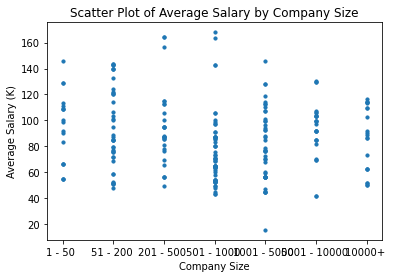

In [6]:
# Making a scatter plot of the average salaries by company size

# DataFrame containing only the Size and Avg Salary columns
size_avg_salary_df = data_analysis_df[['Size','Avg Salary(K)']]

# Specified the order of the size categories
size_avg_salary_df.Size =pd.Categorical(size_avg_salary_df.Size,categories=['1 - 50 ','51 - 200 ','201 - 500 ','501 - 1000 ','1001 - 5000 ','5001 - 10000 ','10000+ '])
size_avg_salary_df=size_avg_salary_df.sort_values('Size')

plt.scatter(size_avg_salary_df['Size'],size_avg_salary_df['Avg Salary(K)'],s= 10)
plt.xlabel("Company Size")
plt.ylabel("Average Salary (K)")
plt.title("Scatter Plot of Average Salary by Company Size")
plt.show()

In [7]:
# From this plot, it seems like company size does not play a huge role in average salary
# There is a wide range of average salaries across company sizes

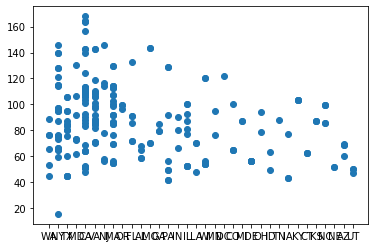

In [8]:
# Making a scatter plot of job location vs average salary
loc_avg_sal_df = data_analysis_df[['Job Location','Avg Salary(K)']]
plt.scatter(data_analysis_df['Job Location'],data_analysis_df['Avg Salary(K)'])
plt.show()